# Data Mining

*   Nama: Shakina Putri Syifani
*   NIM : 211011401466

## Import & Load Dataset

In [77]:
# Import Library
import pandas as pd
from google.colab import files
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt


# Load Dataset
uploaded = files.upload()
df = pd.read_excel("Datasets Superstore.xlsx")

Saving Datasets Superstore.xlsx to Datasets Superstore (7).xlsx


## Algoritma

### Random Forest


In [78]:
#RANDOM FOREST
df.head()

,Row ID,Order ID,Order Date,Year,Month,Day,Ship Mode,Customer ID,Customer Name,Segment,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016,November,8,Second Class,CG-12520,Claire Gute,Consumer,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016,November,8,Second Class,CG-12520,Claire Gute,Consumer,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016,Juni,12,Second Class,DV-13045,Darrin Van Huff,Corporate,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015,Oktober,11,Standard Class,SO-20335,Sean O'Donnell,Consumer,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015,Oktober,11,Standard Class,SO-20335,Sean O'Donnell,Consumer,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [79]:
# Cek Data Yang Hilang
df.info()
print("\nMissing values:\n", df.isnull().sum())
df.describe()
print(df.columns)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Year           9994 non-null   int64         
 4   Month          9994 non-null   object        
 5   Day            9994 non-null   int64         
 6   Ship Mode      9994 non-null   object        
 7   Customer ID    9994 non-null   object        
 8   Customer Name  9994 non-null   object        
 9   Segment        9994 non-null   object        
 10  Country        9994 non-null   object        
 11  City           9994 non-null   object        
 12  State          9994 non-null   object        
 13  Postal Code    9994 non-null   int64         
 14  Region         9994 non-null   object        
 15  Product ID     9994 n

In [80]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

rf_pred = rf_model.predict(X_test)

print("Classification Report (Random Forest):\n", classification_report(y_test, rf_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, rf_pred))
print("Accuracy (Random Forest):", round(accuracy_score(y_test, rf_pred), 4))

Classification Report (Random Forest):
               precision    recall  f1-score   support

           0       0.84      0.80      0.82       547
           1       0.96      0.97      0.96      2452

    accuracy                           0.94      2999
   macro avg       0.90      0.88      0.89      2999
weighted avg       0.94      0.94      0.94      2999

Confusion Matrix:
 [[ 439  108]
 [  83 2369]]
Accuracy (Random Forest): 0.9363


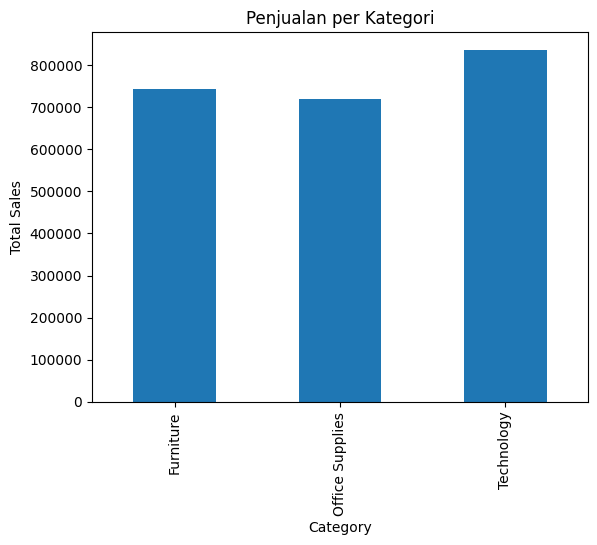

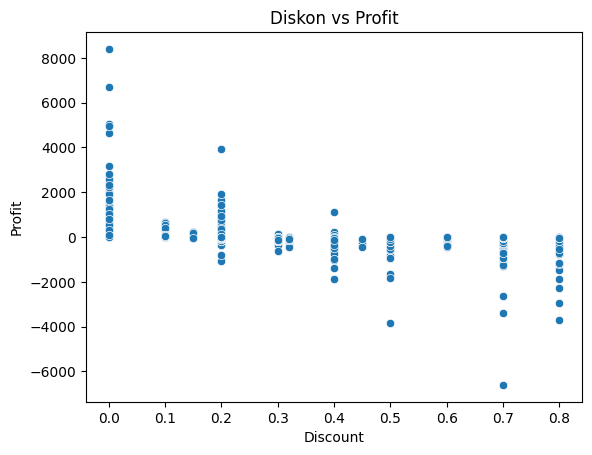

In [81]:
import seaborn as sns
import matplotlib.pyplot as plt

df.groupby('Category')['Sales'].sum().plot(kind='bar', title='Penjualan per Kategori')
plt.ylabel('Total Sales')
plt.show()

sns.scatterplot(data=df, x='Discount', y='Profit')
plt.title('Diskon vs Profit')
plt.show()

### Decision Tree

In [82]:
# #DECISION TREE
df.head()

,Row ID,Order ID,Order Date,Year,Month,Day,Ship Mode,Customer ID,Customer Name,Segment,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016,November,8,Second Class,CG-12520,Claire Gute,Consumer,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016,November,8,Second Class,CG-12520,Claire Gute,Consumer,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016,Juni,12,Second Class,DV-13045,Darrin Van Huff,Corporate,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015,Oktober,11,Standard Class,SO-20335,Sean O'Donnell,Consumer,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015,Oktober,11,Standard Class,SO-20335,Sean O'Donnell,Consumer,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [83]:
# Cek Data Yang Hilang
df.info()
print("\nMissing values:\n", df.isnull().sum())
df.describe()
print(df.columns)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Year           9994 non-null   int64         
 4   Month          9994 non-null   object        
 5   Day            9994 non-null   int64         
 6   Ship Mode      9994 non-null   object        
 7   Customer ID    9994 non-null   object        
 8   Customer Name  9994 non-null   object        
 9   Segment        9994 non-null   object        
 10  Country        9994 non-null   object        
 11  City           9994 non-null   object        
 12  State          9994 non-null   object        
 13  Postal Code    9994 non-null   int64         
 14  Region         9994 non-null   object        
 15  Product ID     9994 n

In [84]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

df['Label'] = df['Profit'].apply(lambda x: 1 if x > 0 else 0)
features = df[['Sales', 'Discount', 'Quantity']].fillna(0)
labels = df['Label']

X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.3, random_state=42)
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.81      0.81       547
           1       0.96      0.96      0.96      2452

    accuracy                           0.93      2999
   macro avg       0.89      0.88      0.89      2999
weighted avg       0.93      0.93      0.93      2999

Confusion Matrix:
 [[ 441  106]
 [  95 2357]]


In [85]:
df['Label'] = df['Profit'].apply(lambda x: 1 if x > 0 else 0)
features = df[['Sales', 'Discount', 'Quantity']].fillna(0)
labels = df['Label']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.3, random_state=42)

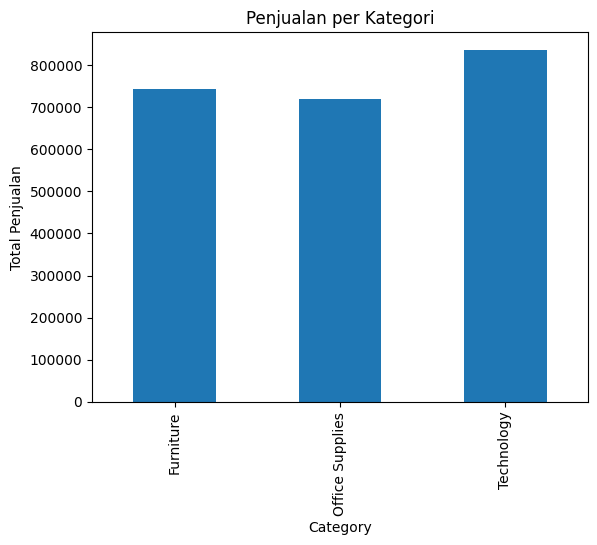

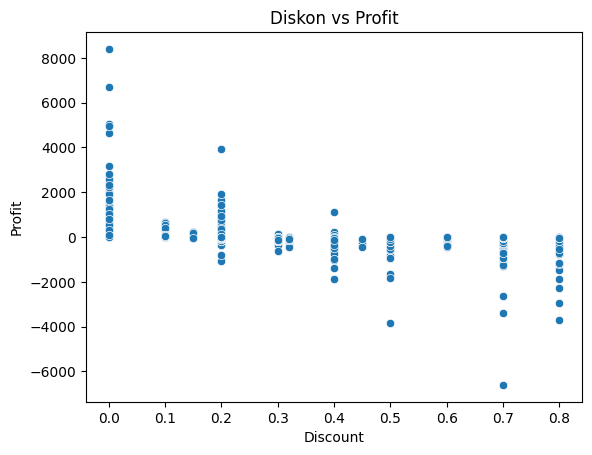

In [86]:
import matplotlib.pyplot as plt
import seaborn as sns

df.groupby('Category')['Sales'].sum().plot(kind='bar', title='Penjualan per Kategori')
plt.ylabel("Total Penjualan")
plt.show()

sns.scatterplot(data=df, x='Discount', y='Profit')
plt.title('Diskon vs Profit')
plt.show()

### K-Means


In [87]:
# #K-MEANS
df.head()

,Row ID,Order ID,Order Date,Year,Month,Day,Ship Mode,Customer ID,Customer Name,Segment,...,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Label
0,1,CA-2016-152156,2016-11-08,2016,November,8,Second Class,CG-12520,Claire Gute,Consumer,...,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,1
1,2,CA-2016-152156,2016-11-08,2016,November,8,Second Class,CG-12520,Claire Gute,Consumer,...,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,1
2,3,CA-2016-138688,2016-06-12,2016,Juni,12,Second Class,DV-13045,Darrin Van Huff,Corporate,...,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,1
3,4,US-2015-108966,2015-10-11,2015,Oktober,11,Standard Class,SO-20335,Sean O'Donnell,Consumer,...,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,0
4,5,US-2015-108966,2015-10-11,2015,Oktober,11,Standard Class,SO-20335,Sean O'Donnell,Consumer,...,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,1


In [88]:
# Cek Data Yang Hilang
df.info()
print("\nMissing values:\n", df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Year           9994 non-null   int64         
 4   Month          9994 non-null   object        
 5   Day            9994 non-null   int64         
 6   Ship Mode      9994 non-null   object        
 7   Customer ID    9994 non-null   object        
 8   Customer Name  9994 non-null   object        
 9   Segment        9994 non-null   object        
 10  Country        9994 non-null   object        
 11  City           9994 non-null   object        
 12  State          9994 non-null   object        
 13  Postal Code    9994 non-null   int64         
 14  Region         9994 non-null   object        
 15  Product ID     9994 n

In [89]:
features = df[['Sales', 'Discount', 'Quantity']].fillna(0)

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

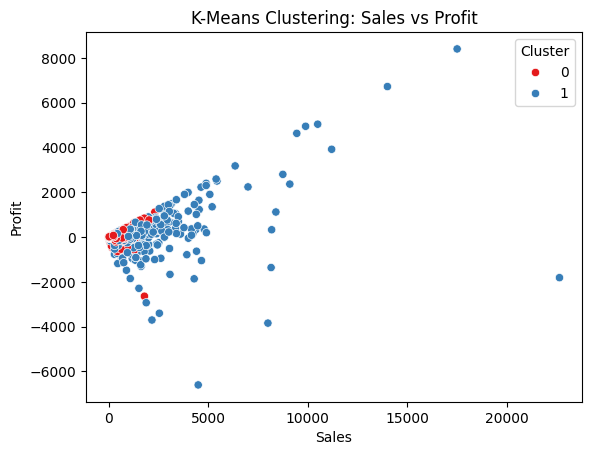

In [90]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, random_state=42)
df['Cluster'] = kmeans.fit_predict(scaled_features)

sns.scatterplot(data=df, x='Sales', y='Profit', hue='Cluster', palette='Set1')
plt.title('K-Means Clustering: Sales vs Profit')
plt.show()

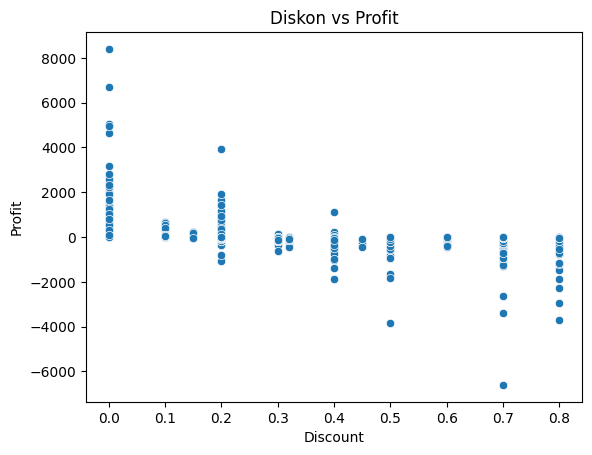

In [91]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.scatterplot(data=df, x='Discount', y='Profit')
plt.title('Diskon vs Profit')
plt.show()

In [92]:
df['Label'] = df['Profit'].apply(lambda x: 1 if x > 0 else 0)

from sklearn.metrics import accuracy_score
import numpy as np

acc1 = accuracy_score(df['Label'], df['Cluster'])
acc2 = accuracy_score(df['Label'], 1 - df['Cluster'])
best_acc = max(acc1, acc2)

print("Akurasi K-Means terhadap label Profit > 0:", round(best_acc, 4))
print("Distribusi:\n", pd.crosstab(df['Label'], df['Cluster']))

Akurasi K-Means terhadap label Profit > 0: 0.6736
Distribusi:
 Cluster     0     1
Label              
0        1472   464
1        6268  1790


In [93]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

kmeans = KMeans(n_clusters=2, random_state=42)
df['Cluster'] = kmeans.fit_predict(scaled_features)

from sklearn.metrics import accuracy_score
acc1 = accuracy_score(df['Label'], df['Cluster'])
acc2 = accuracy_score(df['Label'], 1 - df['Cluster'])
kmeans_acc = max(acc1, acc2)

print("=== K-Means Clustering ===")
print("Akurasi :", round(kmeans_acc, 4))

=== K-Means Clustering ===
Akurasi : 0.6736


## Komparasi 3 Algoritma


In [94]:
#KOMPARASI 3 ALGORITMA
df.head()

,Row ID,Order ID,Order Date,Year,Month,Day,Ship Mode,Customer ID,Customer Name,Segment,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Label,Cluster
0,1,CA-2016-152156,2016-11-08,2016,November,8,Second Class,CG-12520,Claire Gute,Consumer,...,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,1,0
1,2,CA-2016-152156,2016-11-08,2016,November,8,Second Class,CG-12520,Claire Gute,Consumer,...,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,1,0
2,3,CA-2016-138688,2016-06-12,2016,Juni,12,Second Class,DV-13045,Darrin Van Huff,Corporate,...,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,1,0
3,4,US-2015-108966,2015-10-11,2015,Oktober,11,Standard Class,SO-20335,Sean O'Donnell,Consumer,...,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,0,1
4,5,US-2015-108966,2015-10-11,2015,Oktober,11,Standard Class,SO-20335,Sean O'Donnell,Consumer,...,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,1,0


In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Year           9994 non-null   int64         
 4   Month          9994 non-null   object        
 5   Day            9994 non-null   int64         
 6   Ship Mode      9994 non-null   object        
 7   Customer ID    9994 non-null   object        
 8   Customer Name  9994 non-null   object        
 9   Segment        9994 non-null   object        
 10  Country        9994 non-null   object        
 11  City           9994 non-null   object        
 12  State          9994 non-null   object        
 13  Postal Code    9994 non-null   int64         
 14  Region         9994 non-null   object        
 15  Product ID     9994 n

In [96]:
# Cek Data Yang Hilang
print("\nMissing values:\n", df.isnull().sum())

df['Label'] = df['Profit'].apply(lambda x: 1 if x > 0 else 0)

features = df[['Sales', 'Discount', 'Quantity']].fillna(0)
labels = df['Label']


Missing values:
 Row ID           0
Order ID         0
Order Date       0
Year             0
Month            0
Day              0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
Label            0
Cluster          0
dtype: int64


In [97]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.3, random_state=42)
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

#Decision Tree
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)
dt_pred = dt_model.predict(X_test)

dt_acc = accuracy_score(y_test, dt_pred)
print("=== Decision Tree ===")
print("Akurasi:", round(dt_acc, 4))
print("Classification Report:\n", classification_report(y_test, dt_pred))

#Random Forest
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)

rf_acc = accuracy_score(y_test, rf_pred)
print("=== Random Forest ===")
print("Akurasi:", round(rf_acc, 4))
print("Classification Report:\n", classification_report(y_test, rf_pred))

#K-Means
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

kmeans = KMeans(n_clusters=2, random_state=42)
df['Cluster'] = kmeans.fit_predict(scaled_features)

from sklearn.metrics import accuracy_score
acc1 = accuracy_score(df['Label'], df['Cluster'])
acc2 = accuracy_score(df['Label'], 1 - df['Cluster'])
kmeans_acc = max(acc1, acc2)

print("=== K-Means Clustering ===")
print("Akurasi (terbaik):", round(kmeans_acc, 4))

=== Decision Tree ===
Akurasi: 0.933
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.81      0.81       547
           1       0.96      0.96      0.96      2452

    accuracy                           0.93      2999
   macro avg       0.89      0.88      0.89      2999
weighted avg       0.93      0.93      0.93      2999

=== Random Forest ===
Akurasi: 0.9363
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.80      0.82       547
           1       0.96      0.97      0.96      2452

    accuracy                           0.94      2999
   macro avg       0.90      0.88      0.89      2999
weighted avg       0.94      0.94      0.94      2999

=== K-Means Clustering ===
Akurasi (terbaik): 0.6736


# Kesimpulan

In [98]:
print("\n=== Ringkasan Akurasi ===")
print(f"Decision Tree   : {round(dt_acc, 4)}")
print(f"Random Forest   : {round(rf_acc, 4)}")
print(f"K-Means         : {round(kmeans_acc, 4)}")

print("\n=== Jadi, yang paling akurat adalah Random Forest ===")


=== Ringkasan Akurasi ===
Decision Tree   : 0.933
Random Forest   : 0.9363
K-Means         : 0.6736

=== Jadi, yang paling akurat adalah Random Forest ===
